<a href="https://colab.research.google.com/github/surekha2208/PowerBI-Land-Disasters-/blob/main/bank_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_credit=pd.read_csv('credit_train.csv')

In [3]:
df_credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
df_credit.shape

(100514, 19)

In [6]:
df_credit.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [7]:
df_credit.dropna(inplace=True)

In [8]:
columns_to_drop_na = ['Loan ID', 'Customer ID', 'Loan Status','Current Loan Amount','Term','Credit Score','Annual Income','Years in current job','Home Ownership','Purpose','Monthly Debt','Years of Credit History','Months since last delinquent','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens',]
df_credit.dropna(subset=columns_to_drop_na, inplace=True)

In [9]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       36423 non-null  object 
 1   Customer ID                   36423 non-null  object 
 2   Loan Status                   36423 non-null  object 
 3   Current Loan Amount           36423 non-null  float64
 4   Term                          36423 non-null  object 
 5   Credit Score                  36423 non-null  float64
 6   Annual Income                 36423 non-null  float64
 7   Years in current job          36423 non-null  object 
 8   Home Ownership                36423 non-null  object 
 9   Purpose                       36423 non-null  object 
 10  Monthly Debt                  36423 non-null  float64
 11  Years of Credit History       36423 non-null  float64
 12  Months since last delinquent  36423 non-null  float64
 13  N

**Using countplot to find the customers loan status**

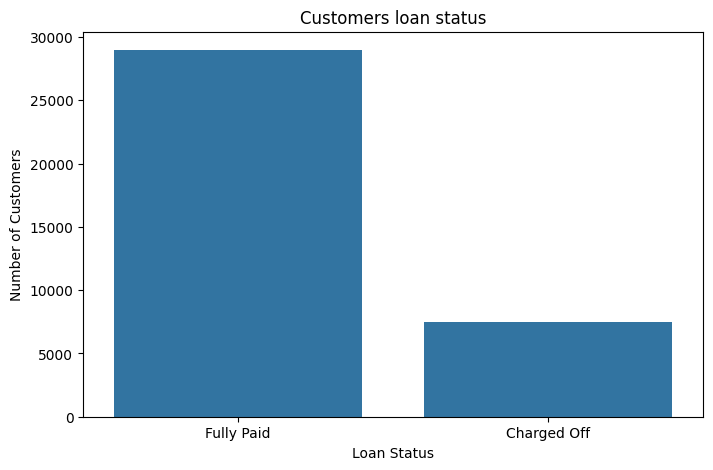

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_credit['Loan Status'])
plt.title('Customers loan status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Customers')
plt.show()

**Distribution of Annual Income based on Loan Status**

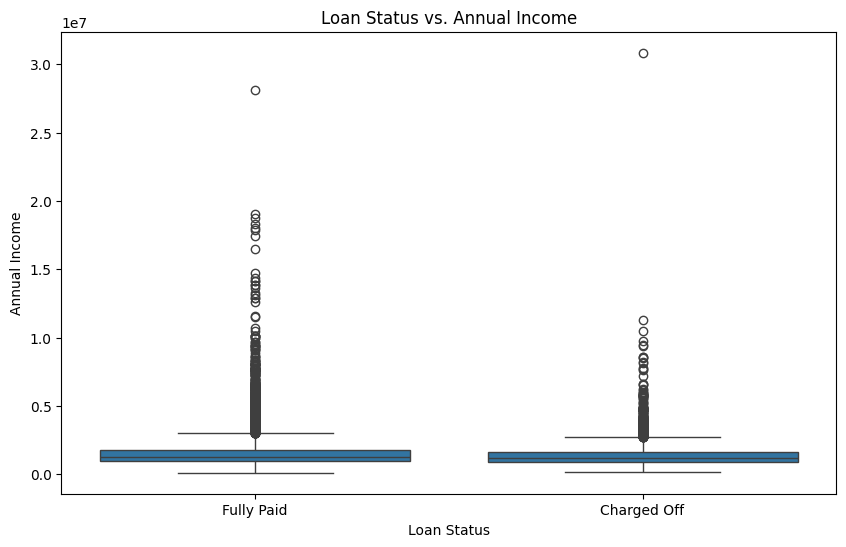

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Status', y='Annual Income', data=df_credit)
plt.title('Loan Status vs. Annual Income')
plt.show()

**Using countplot for Distribution of Home Ownership**

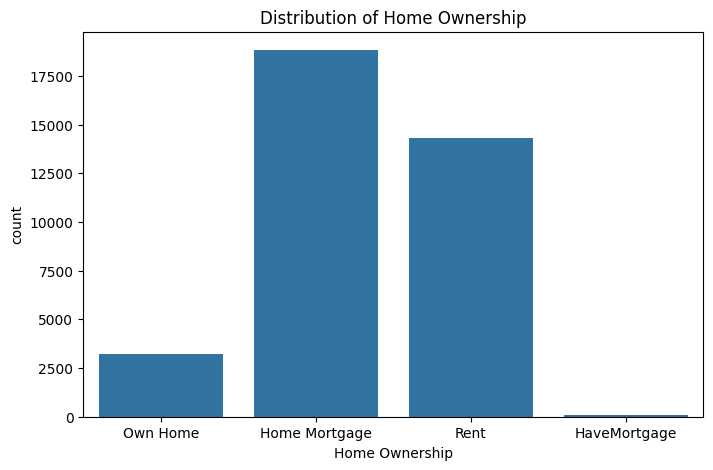

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Home Ownership', data=df_credit)
plt.title('Distribution of Home Ownership')
plt.show()

**Correlation of numeric variables in the dataset**

<ipython-input-19-ea99be00fdcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_credit.corr()


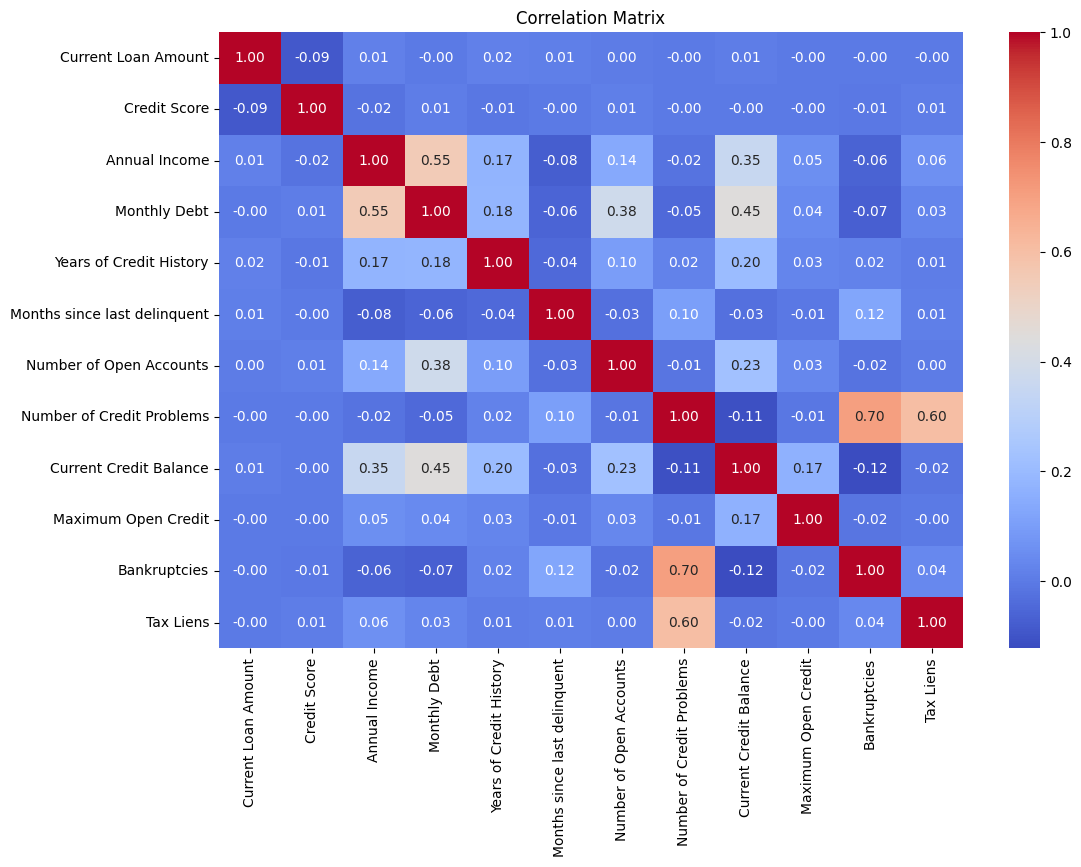

In [19]:
correlation_matrix = df_credit.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #cool(blue),warm(red), fmt(format of 2 decimal points in heat map)
plt.title('Correlation Matrix')
plt.show()

**Correlation of Current Loan Amount,Credit Score,Annual Income and Monthly Debt**

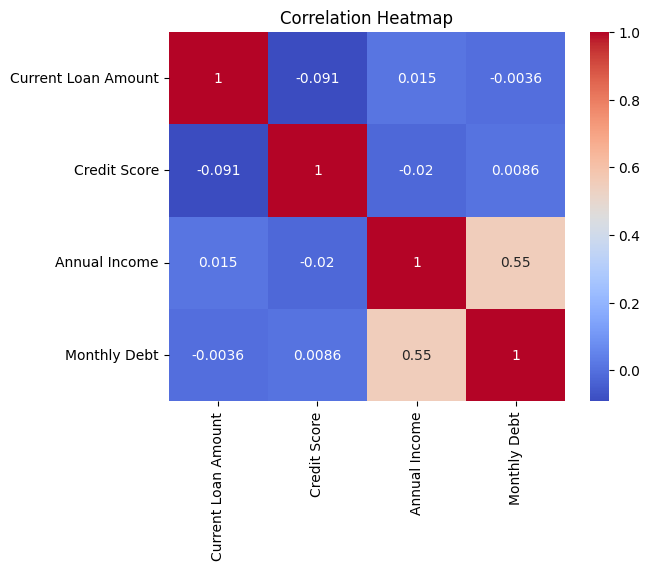

In [20]:
correlation_matrix = df_credit[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Credit Score distribution by Loan Status**

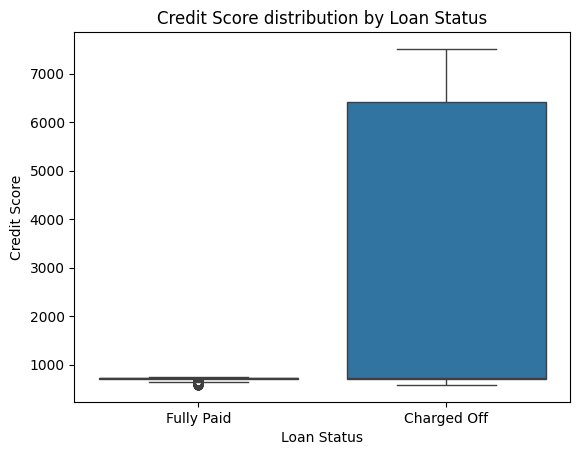

In [22]:
sns.boxplot(x='Loan Status', y='Credit Score', data=df_credit)
plt.title('Credit Score distribution by Loan Status')
plt.show()

**Credit Score distribution by Loan Term**

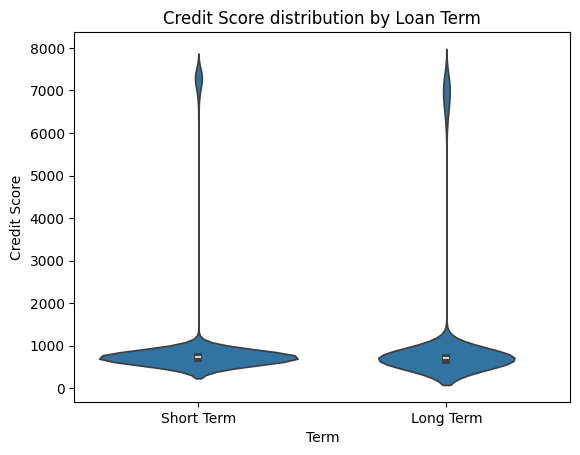

In [23]:
sns.violinplot(x='Term', y='Credit Score', data=df_credit)
plt.title('Credit Score distribution by Loan Term')
plt.show()